# Session 2 Highlights

### A model

$y_i=\beta_0 + \beta_1 \cdot x_i + \epsilon_i$

### An objective function 

$SSR(\beta_0,\beta_1) = \sum_i \epsilon_i^2=\sum_i \left(y_i-\beta_0 - \beta_1 \cdot x_i\right)^2$

### A goal 

Minimize $SSR(\beta_0,\beta_1)$ with respect to $\beta_0,\beta_1$

### In words

Choose $\hat\beta_0$ and $\hat\beta_1$ such that $SSR(\hat\beta_0, \hat\beta_1$) is minimized.

### In equations

$\hat\beta_1 = \displaystyle{\frac{\sum_i(y_i-\overline{y})(x_i-\overline{x})}{\sum_i(x_i-\overline{x})^2} = \frac{Cov(x,y)}{Var(x)}}$

$\hat\beta_0 = \overline{y} - \hat\beta_1 \cdot \overline{x}$

### A predictor

Given $\hat\beta_0$ and $\hat\beta_1$, a predictor of $y_i$ is $\hat y_i = \hat\beta_0 + \hat\beta_1 \cdot x_i$

This is true for our in-sample or training data, $x_i$.  This is also true for our out-of-sample or test data, $x_j$.

### A valid real-world application

CAPM

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.data as web
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

aapl_all = Quandl.get("YAHOO/AAPL", trim_start="2010-1-1", 
                      trim_end="2015-9-18")
nasdaq_all = Quandl.get("NASDAQOMX/COMP", trim_start="2010-1-1", 
                        trim_end="2015-9-18")
aapl = aapl_all['Adjusted Close']
nasdaq = nasdaq_all['Index Value']
aapl_returns = pd.DataFrame(np.log(aapl / aapl.shift(1)))
nasdaq_returns = pd.DataFrame(np.log(nasdaq / nasdaq.shift(1)))
data = pd.merge(nasdaq_returns, aapl_returns, left_index=True, right_index=True)
data.rename(columns={'Index Value':'nasdaq', 'Adjusted Close':'aapl'}, inplace=True)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
print(mod.summary())

Populating the interactive namespace from numpy and matplotlib
                            OLS Regression Results                            
Dep. Variable:                   aapl   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     955.2
Date:                Wed, 23 Sep 2015   Prob (F-statistic):          3.49e-161
Time:                        10:12:33   Log-Likelihood:                 4194.7
No. Observations:                1437   AIC:                            -8385.
Df Residuals:                    1435   BIC:                            -8375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------

### A visual representation

(-0.1, 0.1)

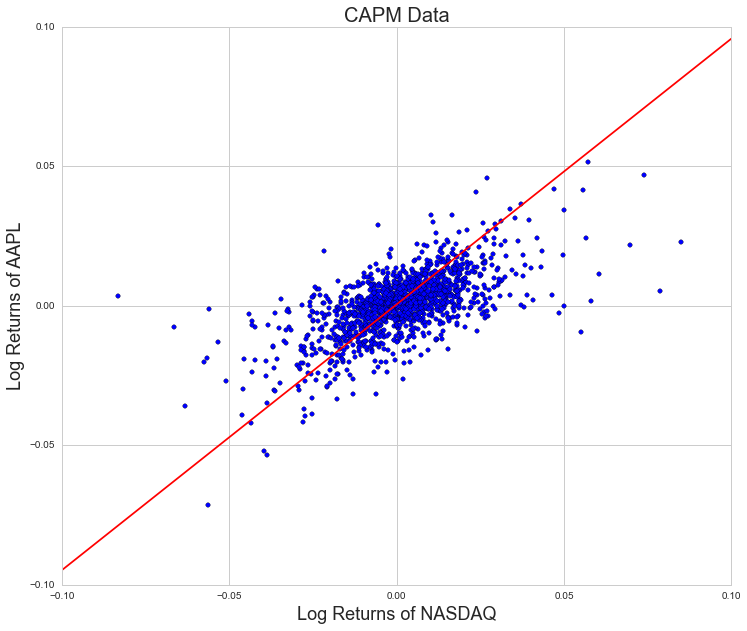

In [2]:
figure, ax = plt.subplots(figsize=(12,10))
ax.scatter(aapl_returns, nasdaq_returns)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of AAPL', fontsize = 18)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 18)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

### A predictor

In [3]:
# Suppose I was told that the daily returns on the NASDAQ were 0.01.  
# What would be my best prediction of the daily returns of AAPL?

print (mod.params['Intercept'] + mod.params['nasdaq'] * .01)

0.00999722697334


## Hypothesis Testing

With the bivariate linear model, we are interested in the general hypothesis

$H_0$ : $\beta_1=0$ or No Relationship

$H_1$ : $\beta_1 \neq 0$ or A Relationship

Z-normalized or t-stat: $\displaystyle{\frac{\hat\theta-\theta_0}{SE(\hat\theta)}}$

$\hat\beta_1 \pm 1.96\cdot SE(\hat\beta_1)$ constitutes at 95% confidence interval in repeated samples.  If this interval includes 0, fail to reject $H_0$.

As can be seen above, these are typically produced with the regression output.

For the CAPM model specifically, we are interested in:

$H_0$ : $\alpha = 0$ and $\beta = 1$

$H_1$ : not $H_0$

As can be seen above, for AAPL, we would fail to reject $H_0$.